## Week HW
### 1. FCB 3.3
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

(a)

In [34]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta)**sy*np.exp(-n*theta)

# prior parameters for thetaA ~ gamma(a,b)
a1 = 120
b1 = 10
prior1 = st.gamma(a1, scale= 1/b1)

# prior parameters for thetaB ~ gamma(a,b)
a2 = 12
b2 = 1
prior2 = st.gamma(a2, scale= 1/b2)

# data in group A and posterior distribution
# n=number of mice, sy=sum of their numbers
nA = 10
syA = 117
postA = st.gamma(a1+syA, scale=1/(b1+nA))

# data in group B and posterior distribution
nB = 13
syB = 113
postB = st.gamma(a2+syB, scale=1/(b2+nB))

**Group A Bayesian Analysis**

In [35]:
# posterior mean (Group A)
(a1+syA)/(b1+nA)

11.85

In [36]:
# posterior mode (Group A)
(a1+syA-1)/(b1+nA)

11.8

In [37]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

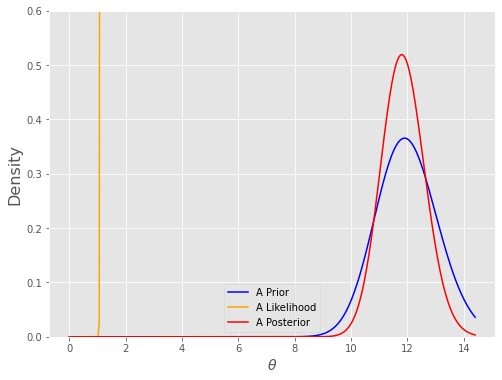

In [63]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

**Group B Bayesian Analysis**

In [39]:
# posterior mean (Group B)
(a2+syB)/(b2+nB)

8.928571428571429

In [40]:
# posterior mode (Group B)
(a2+syB-1)/(b2+nB)

8.857142857142858

In [41]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

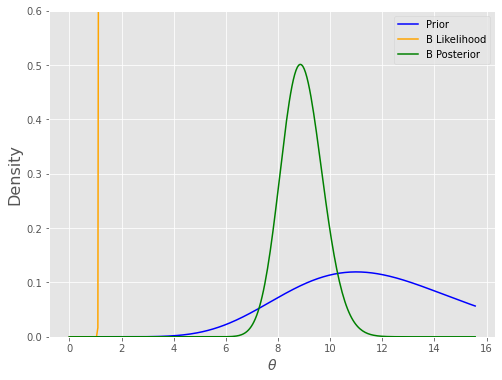

In [65]:
thetas = np.linspace(0.001, ubB+5, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior2.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

**Comparing Two Posterior Distributions**

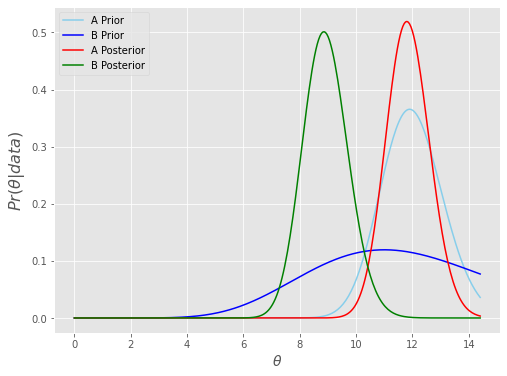

In [70]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='skyblue')
plt.plot(thetas, prior2.pdf(thetas), label='B Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

(b)

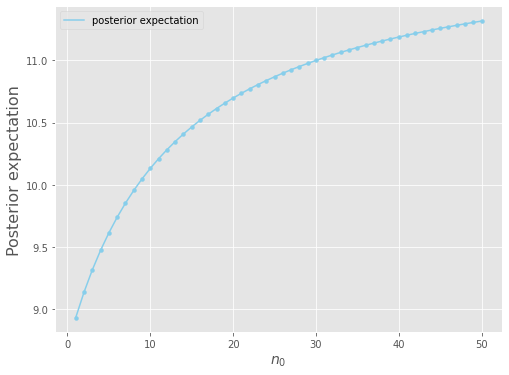

In [94]:
nzeros = np.linspace(1, 50, 50)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(nzeros, (12*nzeros+syB)/(nzeros+nB), label='posterior expectation', c='skyblue')
plt.scatter(nzeros, (12*nzeros+syB)/(nzeros+nB), c='skyblue', s=15)
plt.xlabel(r'$n_{0}$', fontsize=14)
plt.ylabel("Posterior expectation", fontsize=16)
plt.legend();

nzero가 커질수록 prior belief가 커지며, theta 값이 12에 까까워진다. B의 경우는 data가 A보다 더 작은 평균을 가지고 있으므로 더 강한 prior를 주어야 theatA의 posterior expectation과 가까워지며, nzeor가 50에 가까워질수록 thetaA의 posterior mean과 가까워진다.

(c)

우리는 A에 대한 사전 지식을 갖고 있다. 그래서 이를 반영해서 꽤 강한 prior를 설정해 줬었고, B 또한 A와 연관이 돼 있다는 사실 또한 알고 있다. 하지만, B가 A와 연관이 되어 있을 뿐 아예 다른 기댓값을 가질 수도 있기 때문에 약한 prior를 주는 것으로 진행했다. 아예 다른 가능성도 있기 때문에 이 둘은 독립적이라고 봐야 한다.

### 2. Data가 binomial distribution일때, Likelihood를 Exponential Families 형태로 변환해 보기. 또한 왜 Beta distribution이 Conjugacy인지 생각해 보기

Likelihood:

$\begin{aligned} p\left(y_{1}, y_{2}, \cdots, y_{n} \mid \theta\right) &=\prod_{i=1}^{n} p\left(y_{i} \mid \theta\right) \\ &=\prod_{i=1}^{n} \theta^{y_{i}}(1-\theta)^{1-y_{i}} \\ &=\theta^{\sum_{i=1}^{n} y_{i}}(1-\theta)^{\sum_{i=1}^{n}\left(1-y_{i}\right)} \\ &=\theta^{y}(1-\theta)^{n-y} \quad \text { where } y=\sum_{i=1}^{n} y_{i} \\ &=\left(\frac{\theta}{1-\theta}\right)^{y}(1-\theta)^{n} \\ &=e^{\phi y}\left(1+e^{\phi}\right)^{-n} \quad \text { where } \phi=\log \frac{\theta}{1-\theta} \end{aligned}$



Prior : $p(\theta) \sim \operatorname{Beta}\left(n_{0} t_{0}, n_{0}\left(1-t_{0}\right)\right)$



$$
\begin{aligned} p(\theta) & \propto \theta^{n_{0} t_{0}-1}(1-\theta)^{n_{0}\left(1-t_{0}\right)-1} \\ & \propto e^{\phi\left(n_{0} t_{0}-1\right)}\left(1+e^{\phi}\right)^{2-n_{0}} 
\end{aligned}
$$  


$\begin{aligned} \text { Posterior : } p(\theta \mid y) \sim \operatorname{Beta}\left(n_{0} t_{0}+y, n_{0}\left(1-t_{0}\right)+(n-y))\right.\\ 
\end{aligned}$

$$\begin{aligned}
p(\phi \mid y) & \propto e^{\phi\left(n_{0} t_{0}-1\right)}\left(1+e^{\phi}\right)^{2-n_{0}} e^{\phi y}\left(1+e^{\phi}\right)^{-n} \\ & \propto e^{\phi\left(n_{0} t_{0}-1+y\right)}\left(1+e^{\phi}\right)^{2-n_{0}-n} \\ & \propto \theta^{\left(n_{0} t_{0}+y\right)-1}(1-\theta)^{n_{0}\left(1-t_{0}\right)+(n-y)-1} \end{aligned}$$

![img](img/k1.png)

### 3. Relationship between Poisson distribution and Negative Binomial Distribution

$X \sim NB(r,p)$ where $p(X=x)={r-1+x \choose x}(1-p)^rp^x$

Let mean $\frac{pr}{1-p}=\lambda $  ->  $p=\frac{\lambda}{r+\lambda}$

3.1 Prove $Poi(\lambda)=\lim_{r \to \infty}NB(r,\frac{\lambda}{r+\lambda})$

![img](img/k2.jpg)

![img](img/k3.jpg)